In [1]:
import pandas as pd

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/social_media_sentiment_analysis.csv')  # adjust path if needed
print("✅ Data Loaded Successfully")
df.head()


✅ Data Loaded Successfully


,Post_ID,User,Timestamp,Text,Platform,Sentiment,Likes,Shares,Comments
0,P0001,riverascott,2025-04-10 18:59:07,Privacy concerns are real with all this tech.,Twitter,Negative,134,38,5
1,P0002,davidsonmanuel,2025-05-26 02:54:07,Tech is growing too fast without enough regula...,Twitter,Negative,261,177,77
2,P0003,tanner28,2025-04-07 20:24:07,I'm worried about deepfakes and misinformation.,Twitter,Negative,484,193,37
3,P0004,melissabowman,2025-05-06 02:09:07,Not impressed by the recent AI model updates.,Facebook,Negative,407,11,66
4,P0005,gwashington,2025-05-08 00:37:07,AI is taking over too many jobs. Scary stuff.,Twitter,Negative,56,14,39


In [5]:
df = pd.read_csv('/content/social_media_sentiment_analysis.csv')


In [6]:
print("✅ Dataset loaded successfully!")

✅ Dataset loaded successfully!


In [7]:
print(df.head())


  Post_ID            User            Timestamp  \
0   P0001     riverascott  2025-04-10 18:59:07   
1   P0002  davidsonmanuel  2025-05-26 02:54:07   
2   P0003        tanner28  2025-04-07 20:24:07   
3   P0004   melissabowman  2025-05-06 02:09:07   
4   P0005     gwashington  2025-05-08 00:37:07   

                                                Text  Platform Sentiment  \
0      Privacy concerns are real with all this tech.   Twitter  Negative   
1  Tech is growing too fast without enough regula...   Twitter  Negative   
2    I'm worried about deepfakes and misinformation.   Twitter  Negative   
3      Not impressed by the recent AI model updates.  Facebook  Negative   
4      AI is taking over too many jobs. Scary stuff.   Twitter  Negative   

   Likes  Shares  Comments  
0    134      38         5  
1    261     177        77  
2    484     193        37  
3    407      11        66  
4     56      14        39  


In [8]:
print(df.shape)

(200, 9)


In [9]:
print(df.columns.tolist())


['Post_ID', 'User', 'Timestamp', 'Text', 'Platform', 'Sentiment', 'Likes', 'Shares', 'Comments']


In [10]:
print(df.dtypes)

Post_ID      object
User         object
Timestamp    object
Text         object
Platform     object
Sentiment    object
Likes         int64
Shares        int64
Comments      int64
dtype: object


In [12]:
print(df.describe())

            Likes      Shares    Comments
count  200.000000  200.000000  200.000000
mean   249.180000   98.025000   48.260000
std    144.114303   57.937797   28.564876
min      2.000000    1.000000    0.000000
25%    126.250000   52.250000   25.750000
50%    262.500000   96.000000   44.000000
75%    363.500000  150.250000   74.250000
max    495.000000  199.000000  100.000000


In [13]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Post_ID    200 non-null    object
 1   User       200 non-null    object
 2   Timestamp  200 non-null    object
 3   Text       200 non-null    object
 4   Platform   200 non-null    object
 5   Sentiment  200 non-null    object
 6   Likes      200 non-null    int64 
 7   Shares     200 non-null    int64 
 8   Comments   200 non-null    int64 
dtypes: int64(3), object(6)
memory usage: 14.2+ KB
None


In [14]:
print(df.isnull().sum())

Post_ID      0
User         0
Timestamp    0
Text         0
Platform     0
Sentiment    0
Likes        0
Shares       0
Comments     0
dtype: int64


In [15]:
df.dropna(how='all', inplace=True)

In [16]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [17]:
df['Text'].fillna('missing_text', inplace=True)


<ipython-input-17-2b920dc31351>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Text'].fillna('missing_text', inplace=True)


In [18]:
df.columns = df.columns.str.strip()

In [19]:
df['Text'] = df['Text'].str.lower()


In [20]:
import re
df['Text'] = df['Text'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))


In [21]:
df.drop_duplicates(inplace=True)


In [22]:
df.reset_index(drop=True, inplace=True)


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

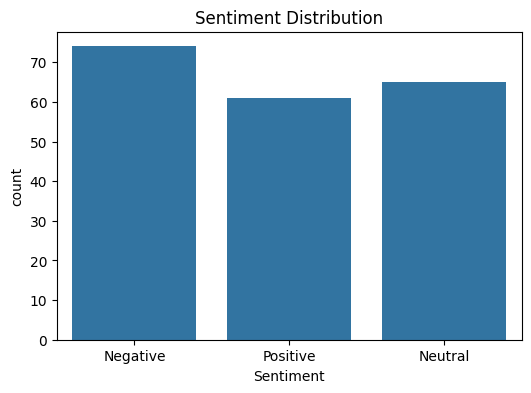

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()


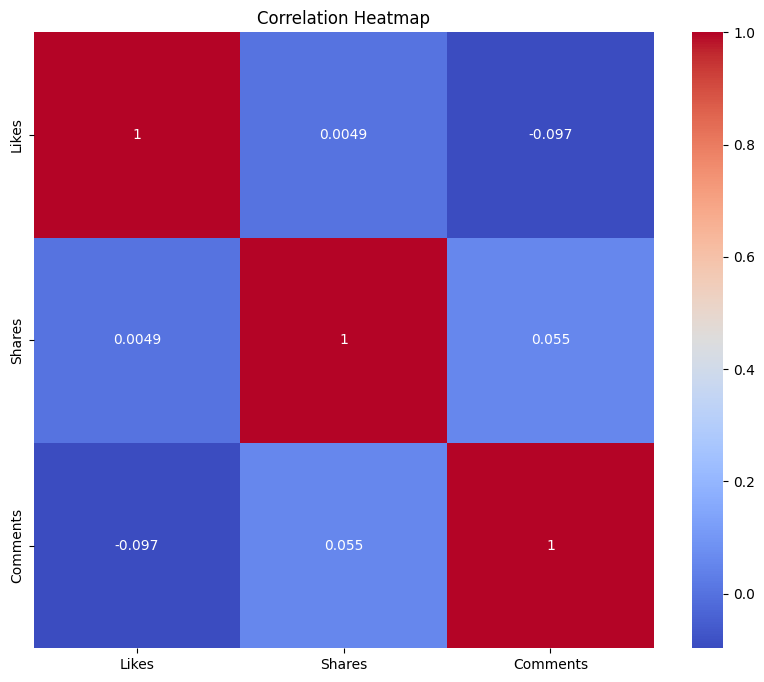

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [26]:
sns.set(style="whitegrid")

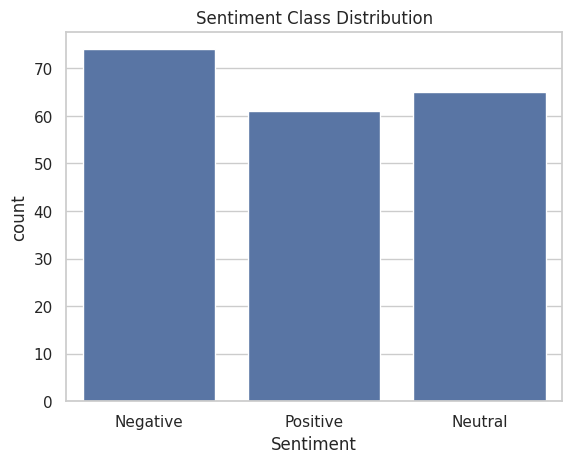

In [27]:
sns.countplot(data=df, x='Sentiment')
plt.title("Sentiment Class Distribution")
plt.show()


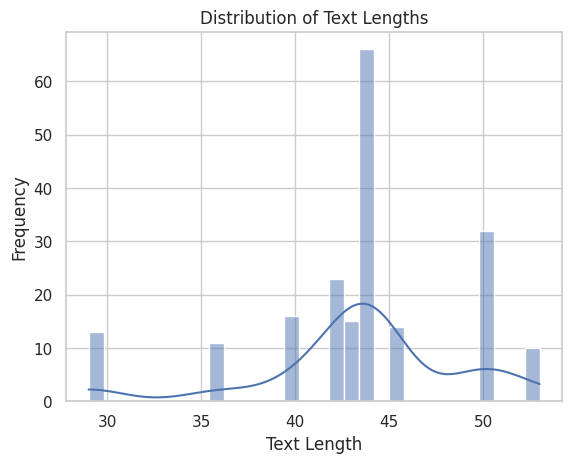

In [28]:
df['text_length'] = df['Text'].apply(len)
sns.histplot(df['text_length'], bins=30, kde=True)
plt.title("Distribution of Text Lengths")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()


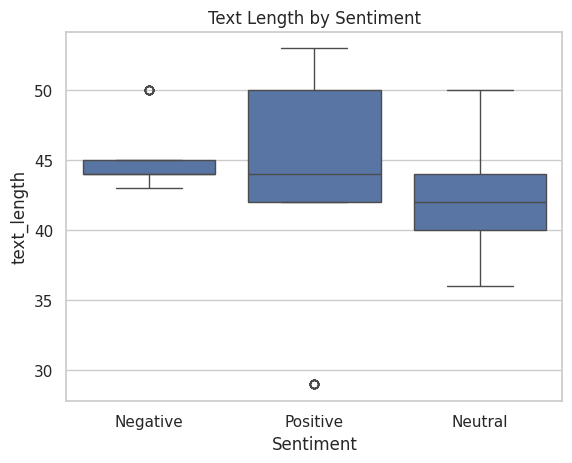

In [29]:
sns.boxplot(x='Sentiment', y='text_length', data=df)
plt.title("Text Length by Sentiment")
plt.show()

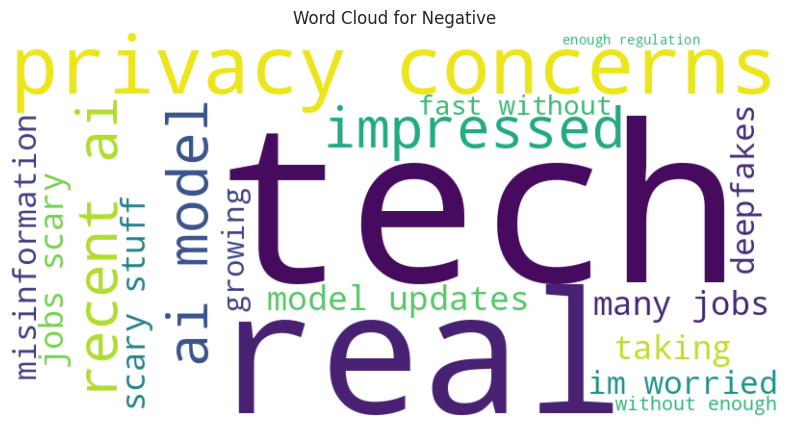

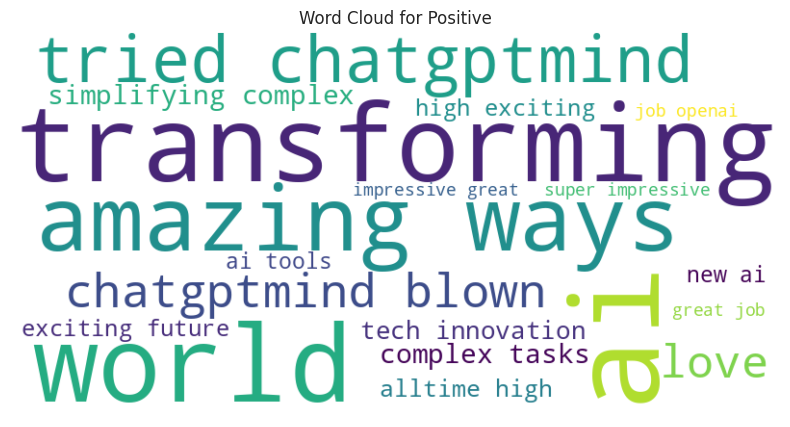

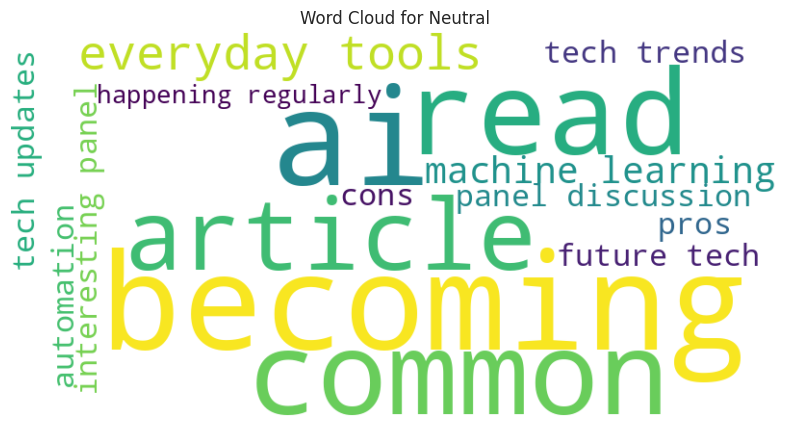

In [30]:
from wordcloud import WordCloud

for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['Text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {sentiment}")
    plt.show()

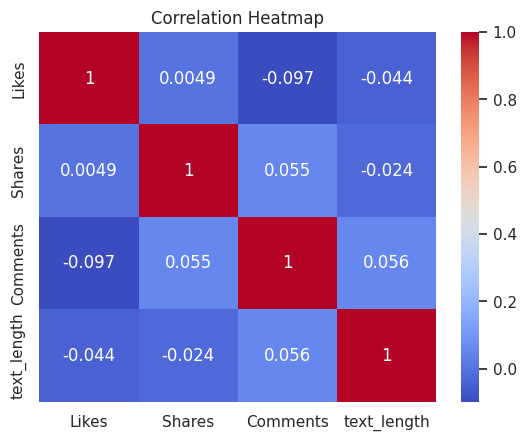

In [31]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


In [32]:
df['Sentiment'].value_counts(normalize=True)


,proportion
Sentiment,
Negative,0.370
Neutral,0.325
Positive,0.305


In [33]:
df.groupby('Sentiment')['text_length'].mean()


,text_length
Sentiment,
Negative,44.959459
Neutral,42.338462
Positive,42.770492


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


In [35]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Features and labels
X = df['Text']
y = df['Sentiment']

# Text vectorization
vectorizer = TfidfVectorizer()
X_vec = vectorizer.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_vec, y, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [36]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

In [37]:
X = df['Text']
y = df['Sentiment']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

In [40]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Features and labels
X = df['Text']
y = df['Sentiment']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Option 1: TF-IDF Vectorizer + Logistic Regression
pipeline_lr = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression(max_iter=1000))
])
pipeline_lr.fit(X_train, y_train)
y_pred_lr = pipeline_lr.predict(X_test)

# Option 2: TF-IDF + Multinomial Naive Bayes
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', MultinomialNB())
])
pipeline_nb.fit(X_train, y_train)
y_pred_nb = pipeline_nb.predict(X_test)

# Option 3: CountVectorizer + Linear SVC
pipeline_svc = Pipeline([
    ('count', CountVectorizer()),
    ('clf', LinearSVC())
])
pipeline_svc.fit(X_train, y_train)
y_pred_svc = pipeline_svc.predict(X_test)

# Option 4: TF-IDF + Random Forest
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier(n_estimators=100, random_state=42))
])
pipeline_rf.fit(X_train, y_train)
y_pred_rf = pipeline_rf.predict(X_test)


In [42]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [43]:
accuracy = accuracy_score(y_test, y_pred)
print(f"📈 Model Accuracy: {accuracy:.2f}")


📈 Model Accuracy: 1.00


In [44]:
cm = confusion_matrix(y_test, y_pred)


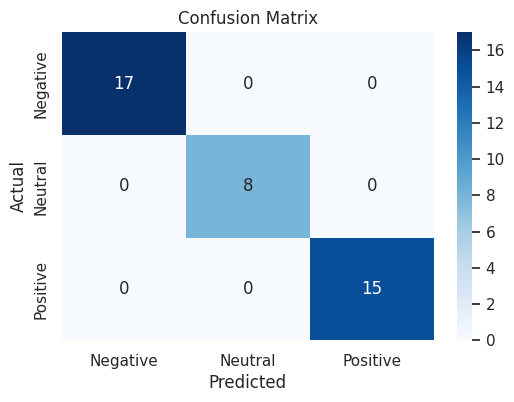

In [45]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [46]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, f1_score

# Example: Evaluate Logistic Regression model
accuracy_score(y_test, y_pred_lr)
precision_score(y_test, y_pred_lr, average='weighted', zero_division=0)
recall_score(y_test, y_pred_lr, average='weighted', zero_division=0)
f1_score(y_test, y_pred_lr, average='weighted', zero_division=0)
classification_report(y_test, y_pred_lr, output_dict=True)  # Get metrics as a dictionary
confusion_matrix(y_test, y_pred_lr)


array([[17,  0,  0],
       [ 0,  8,  0],
       [ 0,  0, 15]])

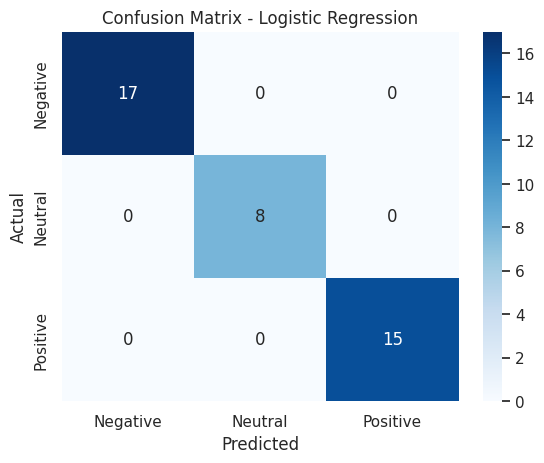

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=sorted(df['Sentiment'].unique()), yticklabels=sorted(df['Sentiment'].unique()))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


<ipython-input-50-e3814a0b7c2c>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


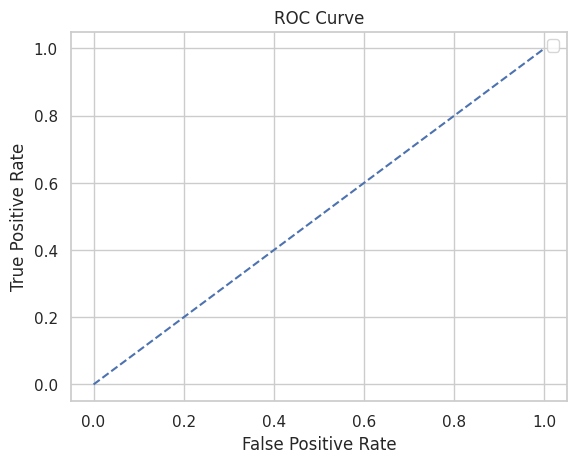

In [50]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import LabelBinarizer

# Only for binary classification (e.g., Positive vs Negative)
lb = LabelBinarizer()
y_test_bin = lb.fit_transform(y_test)
y_pred_proba = pipeline_lr.predict_proba(X_test)[:, 1]

plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


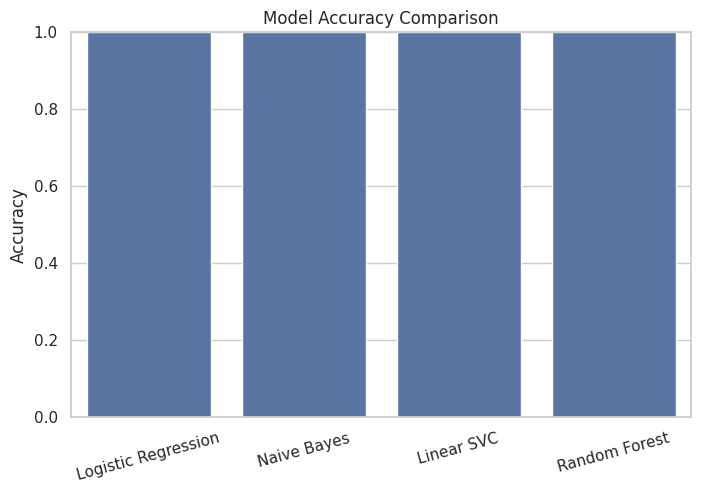

In [51]:
# Accuracy comparison
model_accuracies = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Naive Bayes': accuracy_score(y_test, y_pred_nb),
    'Linear SVC': accuracy_score(y_test, y_pred_svc),
    'Random Forest': accuracy_score(y_test, y_pred_rf)
}

# Bar chart for accuracy comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=list(model_accuracies.keys()), y=list(model_accuracies.values()))
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=15)
plt.show()
